<h4>Name : Reetesh Gopal Zope <br/>
Student ID: 801138214 <br/>
Email ID: rzope1@uncc.edu </h4>

## Travel Package Purchase Prediction - Ensemble Technique and Hyperparameter tuning

### Problem Statement

<p>The company is seeking to enable and establish a viable business model in order to grow its customer base. Introducing a new package offering is one way to broaden the customer base. Currently, the company offers five different types of packages: basic, standard, deluxe, super deluxe, and king. Looking at data recorded in the previous year, company discovered that 18% of customers purchased the packages. The marketing cost, on the other hand, was quite high because customers were contacted at random without analyzing the available information. </p>
<p>The company is now preparing to launch a new product called the Wellness Tourism Package. Wellness tourism is defined as travel that allows the traveller to maintain, improve, or begin a healthy lifestyle, as well as support or increase one's sense of well-being. However, this time the company wishes to leverage the available data of existing and potential customers in order to make marketing expenditure more efficient.</p>

<h2>Data Dictionary</h2>

Customer details:

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

In [1]:
!pip install xgboost

In [2]:
#Importing basic required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Importing dataset
df_tpkg = pd.read_csv('tour_package.csv')

#Showing 1st 10 rows of dataset
df_tpkg.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [4]:
#Checking the data types of the columns for the dataset.
df_tpkg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
#Summarising the dataset
df_tpkg.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


### Preprocessing the data

In [6]:
#Dropping feature CustomerID as it has no significance in prediction.
df_tpkg.drop(['CustomerID'],axis=1,inplace=True)

In [7]:
cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]

In [8]:
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(df_tpkg[i].value_counts())
    print('*'*50)

Unique values in Designation are :
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
**************************************************
Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in OwnCar are :
1    3032
0    1856
Name: OwnCar, dtype: int64
**************************************************
Unique values in Passport are :
0    3466
1    1422
Name: Passport, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in ProductPitched are :

In [9]:
df_tpkg.Gender.value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [10]:
## Converting the data type of categorical features to 'category'

cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]
df_tpkg[cat_cols] = df_tpkg[cat_cols].astype('category')
df_tpkg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

### Imputing missing values

In [11]:
df_tpkg.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Gender                        0
CityTier                      0
Occupation                    0
ProductPitched                0
NumberOfPersonVisiting        0
Designation                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
ProdTaken                     0
dtype: int64

In [12]:
round(df_tpkg.isna().sum() / df_tpkg.isna().count() * 100, 2).sort_values(ascending=False)

DurationOfPitch             5.14
MonthlyIncome               4.77
Age                         4.62
NumberOfTrips               2.86
NumberOfChildrenVisiting    1.35
NumberOfFollowups           0.92
PreferredPropertyStar       0.53
TypeofContact               0.51
Gender                      0.00
CityTier                    0.00
Occupation                  0.00
ProductPitched              0.00
NumberOfPersonVisiting      0.00
Designation                 0.00
MaritalStatus               0.00
Passport                    0.00
PitchSatisfactionScore      0.00
OwnCar                      0.00
ProdTaken                   0.00
dtype: float64

##### Imputing feature TypeofContact

In [13]:
# feature TypeofContact
df_tpkg['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [14]:
# Lets impute missing value with mode value of the feature TypeofContact
df_tpkg['TypeofContact'].mode()

df_tpkg['TypeofContact']=df_tpkg['TypeofContact'].fillna('Self Enquiry')

# Verifing if there are null values
df_tpkg["TypeofContact"].isnull().sum()

0

##### Imputing feature NumberOfFollowups

In [15]:
df_tpkg.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].median()

df_tpkg['NumberOfFollowups']=df_tpkg.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].apply(lambda x:x.fillna(x.median()))

In [16]:
df_tpkg["NumberOfFollowups"].isnull().sum()

0

##### Imputing feature PreferredPropertyStar

In [17]:
df_tpkg['PreferredPropertyStar']=df_tpkg.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))

df_tpkg["PreferredPropertyStar"].isnull().sum()

0

#### Imputing feature  DurationOfPitch

In [18]:
df_tpkg.groupby(['ProductPitched','NumberOfFollowups'], as_index=False)["DurationOfPitch"].median()

# Impute missing Duration of pitch with median value
df_tpkg["DurationOfPitch"] = df_tpkg.groupby(["ProductPitched",'NumberOfFollowups'])["DurationOfPitch"].apply(
    lambda x: x.fillna(x.median())
)

df_tpkg[df_tpkg["DurationOfPitch"].isnull()]

df_tpkg["DurationOfPitch"].isnull().sum()

0

#### Imputing feature NumberOfTrips

In [19]:
df_tpkg.groupby(['MaritalStatus'])["NumberOfTrips"].median()

# Impute missing NumberOfTrips of pitch with median value
df_tpkg["NumberOfTrips"] = df_tpkg.groupby(["MaritalStatus"])["NumberOfTrips"].apply(
    lambda x: x.fillna(x.median())
)

df_tpkg["NumberOfTrips"].isnull().sum()

0

In [20]:
df_tpkg["NumberOfTrips"].isnull().sum()

0

##### Imputing feature NumberOfChildrenVisiting

In [21]:
# Impute missing NumberOfChildrenVisited with 0
df_tpkg['NumberOfChildrenVisiting']=df_tpkg['NumberOfChildrenVisiting'].fillna(0)

##### Imputing feature Age

In [22]:
df_tpkg.groupby(["Designation", "Gender","MaritalStatus"])["Age"].median()

# Impute missing Age with median value
df_tpkg["Age"] = df_tpkg.groupby(["Designation", "Gender","MaritalStatus"])["Age"].apply(
    lambda x: x.fillna(x.median())
)

df_tpkg["Age"].isnull().sum()

0

##### Imputing feature MonthlyIncome

In [23]:
df_tpkg.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].median()

df_tpkg["MonthlyIncome"]=df_tpkg.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].apply(
    lambda x: x.fillna(x.median())
)

In [24]:
df_tpkg.Age.describe()

count    4888.000000
mean       37.415303
std         9.162482
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        61.000000
Name: Age, dtype: float64

In [25]:
#Creating bins of Customer Age to find out trend
df_tpkg['Agebin'] = df_tpkg['Agebin'] = pd.cut(df_tpkg['Age'], bins = [15,25, 31, 40, 50, 70], labels = ['15-25','26-30', '31-40', '41-50', '51-70'])
df_tpkg.Agebin.value_counts()

31-40    1894
41-50    1073
26-30    1025
51-70     549
15-25     347
Name: Agebin, dtype: int64

In [26]:
df_tpkg.MonthlyIncome.describe()

count     4888.000000
mean     23535.904153
std       5269.190200
min       1000.000000
25%      20438.250000
50%      22311.000000
75%      25424.750000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [27]:
#Creating bins of Customer Income to find out trend
df_tpkg['Incomebin'] =  pd.cut(df_tpkg['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])
df_tpkg.Incomebin.value_counts()

<25000     2490
<20000     1038
<30000      768
<35000      382
<40000      206
<100000       2
<15000        2
<50000        0
<45000        0
Name: Incomebin, dtype: int64

In [28]:
#Checking if there are still any missing value
df_tpkg.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
Agebin                      0
Incomebin                   0
dtype: int64

### Outliers Detection

In [29]:
Q1 = df_tpkg.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = df_tpkg.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [30]:
((df_tpkg.select_dtypes(include=['float64','int64'])<lower) | (df_tpkg.select_dtypes(include=['float64','int64'])>upper)).sum()/len(df_tpkg)*100

Age                         0.000000
DurationOfPitch             2.291326
NumberOfPersonVisiting      0.061375
NumberOfFollowups           6.382979
PreferredPropertyStar       0.000000
NumberOfTrips               2.229951
PitchSatisfactionScore      0.000000
NumberOfChildrenVisiting    0.000000
MonthlyIncome               7.528642
dtype: float64

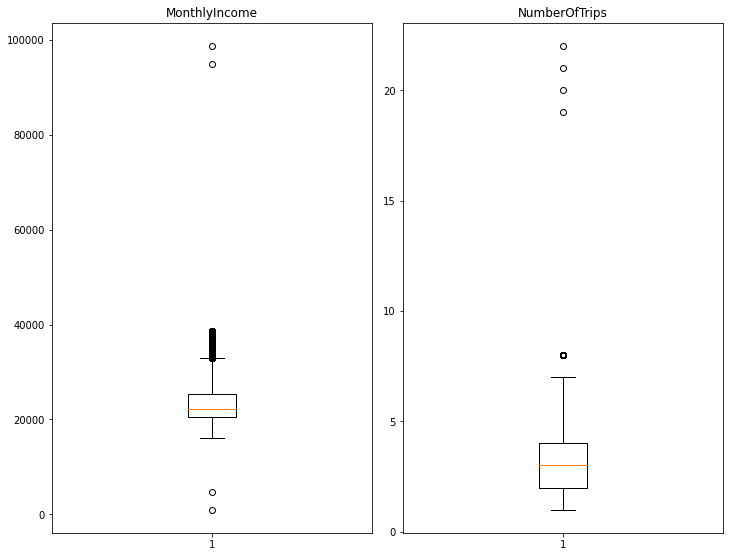

In [31]:
numeric_columns = ['MonthlyIncome','NumberOfTrips']
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(df_tpkg[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [32]:
#Dropping observaions with duration of pitch greater than 40. There are just 2 such observations
df_tpkg.drop(index=df_tpkg[df_tpkg.DurationOfPitch>37].index,inplace=True)

#Dropping observation with monthly income less than 12000 or greater than 40000. There are just 4 such observations
df_tpkg.drop(index=df_tpkg[(df_tpkg.MonthlyIncome>40000) | (df_tpkg.MonthlyIncome<12000)].index,inplace=True)

#Dropping observations with number of trips greater than 8. There are just 4 such observations
df_tpkg.drop(index=df_tpkg[df_tpkg.NumberOfTrips>10].index,inplace=True)

In [33]:
# Separating target column
X = df_tpkg.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch','Agebin','Incomebin'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df_tpkg['ProdTaken']

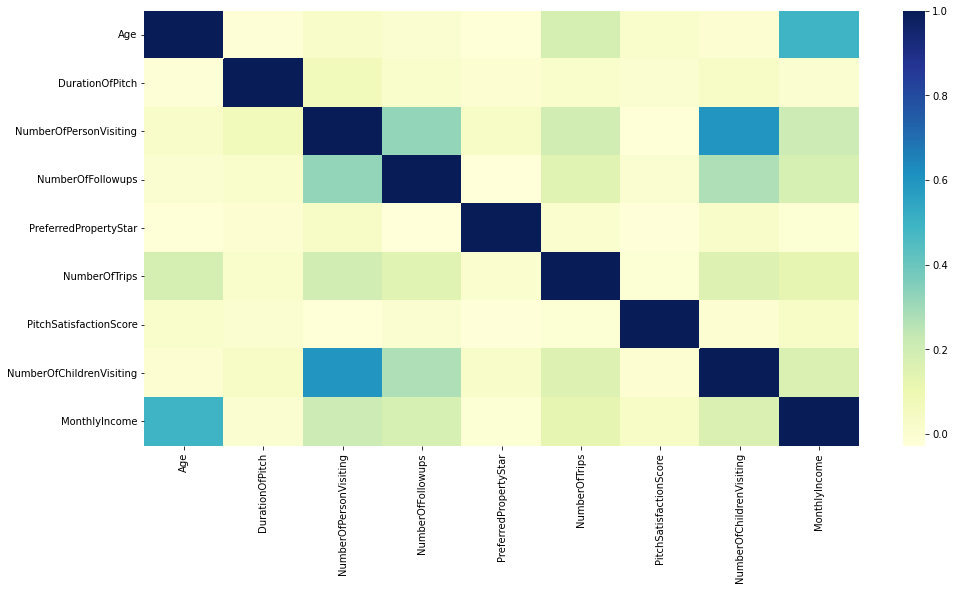

In [34]:
# Generating correlation matrix
corr = df_tpkg.corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr,
            cmap="YlGnBu",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

**Observation**
1. Monthlyincome and Age has weak correlation
2. Number of children visiting and number of person vsiting has correlation as expected.
3. Numberof follow up and number of person vsiting has very weak correlation

In [123]:
# Splitting the data into train and test sets in 70:30 ratio
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape

((3414, 23), (1464, 23))

In [124]:
#Importing libraries required for Ensemble Technique Models
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix #to plot confusion matric
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [125]:
# Function to display confusion matrix
def make_confusion_matrix(y_actual,y_predict,title):
    '''Plot confusion matrix'''
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [126]:
#Defining function to show model metrice score table
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,flag=True):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    if flag == True: 
          metric_names = ['Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall','Train_Precision',
                          'Test_Precision', 'Train_F1-Score', 'Test_F1-Score']
          cols = ['Metric', 'Score']
          records = [(name, score) for name, score in zip(metric_names, score_list)]
          display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)
          make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
          make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
    return score_list # returning the list with train and test scores

In [127]:
# Defining empty lists to add train and test results 
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     '''add score of modelto list'''
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

# Model Building

### Decision Tree
Decision Tree classifier is applied as a base model on the dataset. 

In [128]:
dtree=DecisionTreeClassifier(random_state=1, class_weight={0:0.20, 1:0.80})
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.0,0.864754,1.0,0.605072,1.0,0.652344,1.0,0.62782


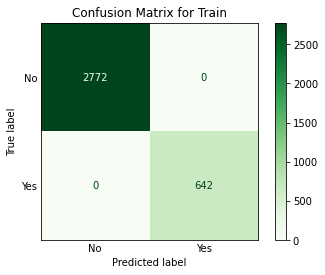

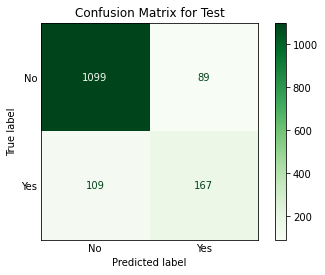

In [129]:
dtree_score=get_metrics_score(dtree,X_train,X_test,y_train,y_test)
add_score_model(dtree_score)

**Observation:**
<p>
Decision tree is overfitting the training data as there is lot of disparity between test and train. It gave decent accuracy score. But Recall score is also not that high.
</p>

## Applying Ensemble Techniques
### Bagging Technique

In [130]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1, verbose=1)
bagging_classifier.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


BaggingClassifier(random_state=1, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.990334,0.891393,0.953271,0.532609,0.995122,0.830508,0.973747,0.649007


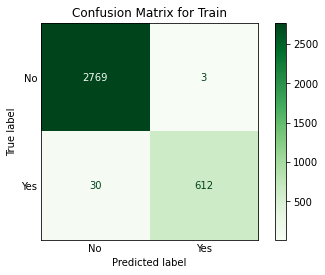

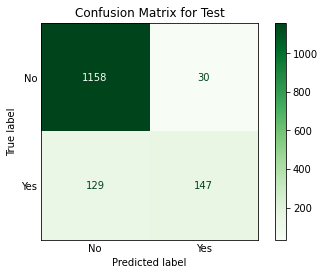

In [131]:
bagging_score=get_metrics_score(bagging_classifier,X_train,X_test,y_train,y_test)
add_score_model(bagging_score)

**Observation:**
<p>
Bagging classifier improved accuracy over the Decision Tree model but Test Recall score reduced which is important for company’s business
</p>

### Random Forest

In [132]:
rf_estimator = RandomForestClassifier(random_state=4)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=4)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.0,0.892077,1.0,0.5,1.0,0.873418,1.0,0.635945


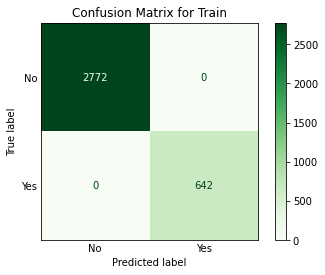

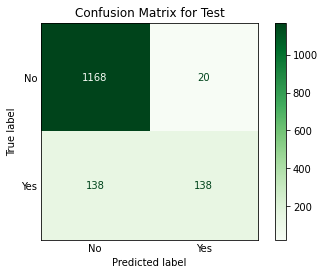

In [133]:
score_list_rf=get_metrics_score(rf_estimator,X_train,X_test,y_train,y_test)
add_score_model(score_list_rf)

**Observation:**
<p>
Random Forest classifier improved accuracy over the Decision Tree model as well as Bagging classifier but test recall score further reduced which makes it not the best suitable model for company’s business
</p>

### XGBoost 

In [134]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.871705,0.858607,0.400312,0.355072,0.829032,0.771654,0.539916,0.486352


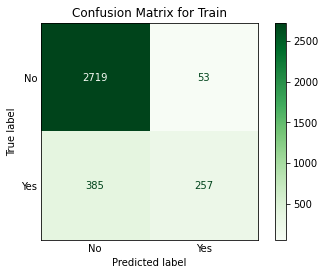

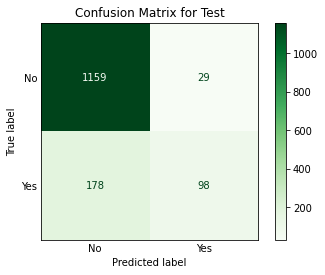

In [135]:
xgb_score=get_metrics_score(xgb,X_train,X_test,y_train,y_test)
add_score_model(xgb_score)

**Observation:**
<p>
XGBoost didn’t worked well on the dataset gave lower accuracy and poor test recall score.
</p>

### Stacking Classifier

In [146]:
estimators=[('Decision Tree', dtree),('Random Forest', rf_estimator),('Tuned XGBoost',xgb_tuned),
           ('Bagging Classifier', bagging_classifier)]
final_estimator=XGBClassifier(random_state=1,eval_metric='logloss')

In [147]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5,n_jobs=-1)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.2,
                                                                     1: 0.8},
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(random_state=4)),
                               ('Tuned XGBoost',
                                XGBClassifier(colsample_bylevel=0.5,
                                              eval_metric='logloss',
                                              learning_rate=0.5,
                                              n_estimators=50, random_state=1,
                                              scale_pos_weight=5)),
                               ('Bagging Classifier',
                                BaggingClassifier(random_state=1, verbose=1))],
                   final_estimator=XGBClass

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.0,0.907787,1.0,0.67029,1.0,0.80786,1.0,0.732673


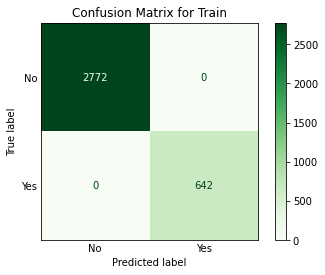

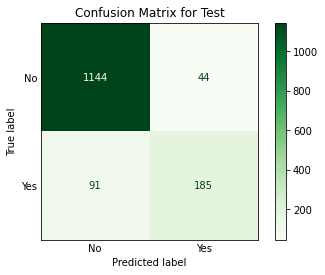

In [148]:
stacking_estimator=get_metrics_score(stacking_estimator,X_train,X_test,y_train,y_test)
add_score_model(stacking_estimator)

**Observation**
<p> 
As we know, stacking combines several different models and create a final meta model. Here, stacking of Decision Tree, Random Forest, Tuned XGBoost and Bagging classifier is done as these models have higher recall score. Stacking gave highest accuracy score than all previously seen models. But recall score reduced slightly.

</p>

## Hyperparameter Tuning
### Tuning of XGBoost Classifier

In [136]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

In [141]:
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,5],
    "colsample_bylevel":[0.5,1],
    "learning_rate":[0.001,0.01,0.1,0.5]
}
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

In [142]:
xgb_tuned.fit(X_train,y_train)

XGBClassifier(colsample_bylevel=0.5, eval_metric='logloss', learning_rate=0.5,
              n_estimators=50, random_state=1, scale_pos_weight=5)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.833626,0.773224,0.861371,0.717391,0.535853,0.438053,0.660693,0.543956


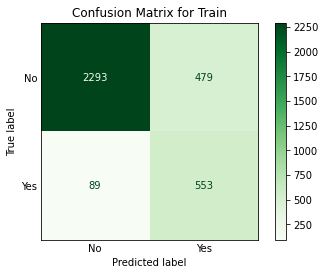

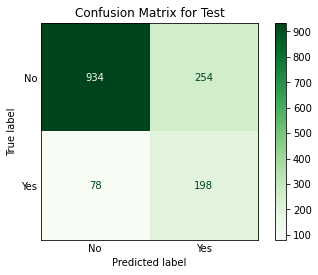

In [143]:
xgb_tuned_score=get_metrics_score(xgb_tuned,X_train,X_test,y_train,y_test)
add_score_model(xgb_tuned_score)

**Observation:**
<p>
Hyperparameter Tuning helps to perfect architecture of the model. Here, Tuning XGBoost gave decent accuracy score and improved test recall score. Tuned XGBoost is gave highest recall score among the previously seen models
</p>

### Tuning Bagging Classifier

In [144]:
# Choose the type of classifier. 

bagging_estimator_tuned = BaggingClassifier(dtree ,random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50,100],
             }
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                      1: 0.8},
                                                        random_state=1),
                  max_features=0.9, max_samples=0.9, n_estimators=100,
                  random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.0,0.892077,1.0,0.5,1.0,0.873418,1.0,0.635945


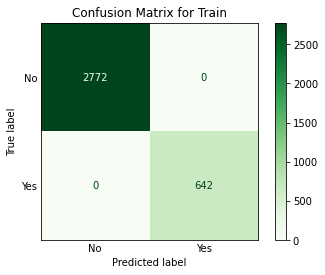

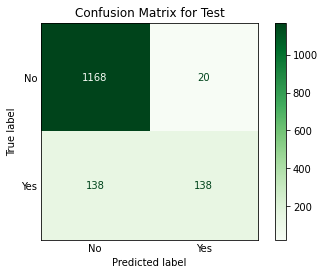

In [145]:
bagging_tuned=get_metrics_score(bagging_estimator_tuned,X_train,X_test,y_train,y_test)
add_score_model(bagging_tuned)

**Observation:**
<p>
Tuned Bagging Classifier gives slightly higher accuracy score but recall score is reduced
</p>

<h2>Comparing All Models</h2>

<p>
In this problem statement, company wants to determine which customers could purchase their new travel packages range. Here, it is important to predict actual positives among all labelled positives. So, Test Recall score is important in our modelling
</p>

In [149]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          'XGboost',
                                          'Tuned XGboost',
                                          'Tuned Bagging Classifier',
                                          'Stacking'
                                          ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
4,Tuned XGboost,0.833626,0.773224,0.861371,0.717391,0.535853,0.438053,0.660693,0.543956
6,Stacking,1.000000,0.907787,1.000000,0.670290,1.000000,0.807860,1.000000,0.732673
0,Decision Tree,1.000000,0.864754,1.000000,0.605072,1.000000,0.652344,1.000000,0.627820
1,Bagging Classifier,0.990334,0.891393,0.953271,0.532609,0.995122,0.830508,0.973747,0.649007
2,Random Forest,1.000000,0.892077,1.000000,0.500000,1.000000,0.873418,1.000000,0.635945
5,Tuned Bagging Classifier,1.000000,0.892077,1.000000,0.500000,1.000000,0.873418,1.000000,0.635945
3,XGboost,0.871705,0.858607,0.400312,0.355072,0.829032,0.771654,0.539916,0.486352


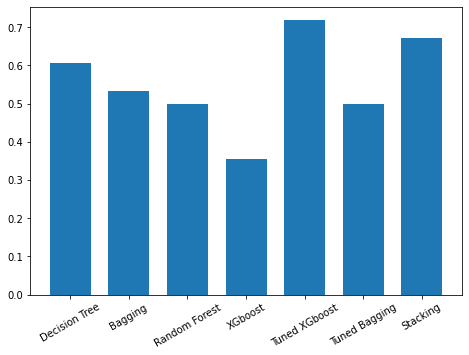

In [154]:
# Comparing test_recall scores of all models
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Decision Tree', 'Bagging', 'Random Forest', 'XGboost', 'Tuned XGboost', 'Tuned Bagging', 'Stacking']
recall_data = recall_test
ax.bar(labels, recall_data, width=0.7) 
plt.xticks(rotation=30)
plt.show()

<h2>Conclusion</h2>
<p>When a machine learning model is applied on any dataset, it can overfit, or it can have high variance or high bias. In either case, it won’t give best possible results. Ensembles Techniques such Bagging, Boosting and Stacking, help to overcome all these problems. Boosting builds a strong classifier from the number of base learners. Bagging combines the bootstrap and aggregation, and it is represented as a parallel ensemble method. Stacking combines independent learners to make a meta learner. Moreover, hyperparameter tuning helps in perfecting a machine learning model to solve a particular problem in real world. </p> 
<p>This paper illustrated, ensemble techniques and hyperparameter tuning by solving a business problem of a travel company. As per the business need, recall is the right metric to evaluate all machine learning models. As per our experimental results, Tuned XGBoost gave best results. Tuned XGBoost can help company to leverage the available data of existing and potential customers in order to make marketing expenditure more efficient. </p>